# DS106: Machine Learning Lesson 1- Hands on

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import data

In [2]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [3]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
21321,1.51,Ideal,F,SI2,62.6,55.0,9471,7.39,7.35,4.61
20418,1.06,Ideal,F,VVS2,61.1,57.0,8776,6.62,6.57,4.03
44639,0.54,Ideal,E,VS2,61.7,55.0,1609,5.23,5.20,3.22
28653,0.33,Very Good,E,VS2,60.6,58.0,675,4.45,4.49,2.71
20420,1.52,Good,I,VS2,63.3,61.0,8778,7.23,7.27,4.59


# Goal: Use carat, cut, color, and clarity to predict the price of diamonds

# Recode the variables to numeric

In [4]:
Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [5]:
def cut_recode (series):
    if series == "Ideal":
        return 0
    if series == "Premium":
        return 1
    if series == "Very Good":
        return 2
    if series == "Good":
        return 3
    if series == "Fair":
        return 4
Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [6]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR
21321,1.51,Ideal,F,SI2,62.6,55.0,9471,7.39,7.35,4.61,0
20418,1.06,Ideal,F,VVS2,61.1,57.0,8776,6.62,6.57,4.03,0
44639,0.54,Ideal,E,VS2,61.7,55.0,1609,5.23,5.20,3.22,0
28653,0.33,Very Good,E,VS2,60.6,58.0,675,4.45,4.49,2.71,2
20420,1.52,Good,I,VS2,63.3,61.0,8778,7.23,7.27,4.59,3


In [7]:
Diamonds.carat.value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.64       1
3.05       1
2.67       1
3.40       1
4.13       1
Name: carat, Length: 273, dtype: int64

In [8]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
def color_recode (series):
    if series == "G":
        return 0
    if series == "E":
        return 1
    if series == "F":
        return 2
    if series == "H":
        return 3
    if series == "D":
        return 4
    if series == "I":
        return 5
    if series == "J":
        return 6
Diamonds['colorR'] = Diamonds['color'].apply(color_recode)

In [10]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR
21321,1.51,Ideal,F,SI2,62.6,55.0,9471,7.39,7.35,4.61,0,2
20418,1.06,Ideal,F,VVS2,61.1,57.0,8776,6.62,6.57,4.03,0,2
44639,0.54,Ideal,E,VS2,61.7,55.0,1609,5.23,5.20,3.22,0,1
28653,0.33,Very Good,E,VS2,60.6,58.0,675,4.45,4.49,2.71,2,1
20420,1.52,Good,I,VS2,63.3,61.0,8778,7.23,7.27,4.59,3,5


In [11]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
def clarity_recode (series):
    if series == "SI1":
        return 0
    if series == "VS2":
        return 1
    if series == "SI2":
        return 2
    if series == "VS1":
        return 3
    if series == "VVS2":
        return 4
    if series == "VVS1":
        return 5
    if series == "IF":
        return 6
    if series == "I1":
        return 7
Diamonds['clarityR'] = Diamonds['clarity'].apply(clarity_recode)

In [13]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
21321,1.51,Ideal,F,SI2,62.6,55.0,9471,7.39,7.35,4.61,0,2,2
20418,1.06,Ideal,F,VVS2,61.1,57.0,8776,6.62,6.57,4.03,0,2,4
44639,0.54,Ideal,E,VS2,61.7,55.0,1609,5.23,5.20,3.22,0,1,1
28653,0.33,Very Good,E,VS2,60.6,58.0,675,4.45,4.49,2.71,2,1,1
20420,1.52,Good,I,VS2,63.3,61.0,8778,7.23,7.27,4.59,3,5,1


# X & Y

In [14]:
x = Diamonds[['cutR', 'carat', 'colorR', 'clarityR']]
y = Diamonds['price']

# Train Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


# Linear Model

In [17]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Examining the Predictions

In [18]:
predictions = lm.predict(x_test)
predictions

array([2556.17401329, 6485.14684615,  406.70550394, ..., 2406.72358943,
       1192.93959528, 1227.00970414])

# Graph y_test against the predictors

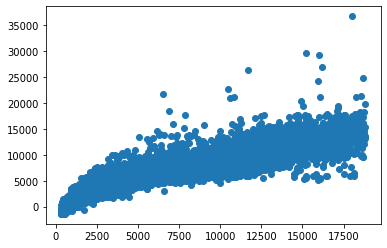

In [19]:
plt.scatter(y_test, predictions)

# Accuracy Score

In [20]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8677091657557514


# This model predicts the price of diamonds 86.5% of the time

# Examining the Error

# Mean Absolute Error

In [21]:
metrics.mean_absolute_error(y_test, predictions)

946.6505124053449

# Mean Squared Error

In [22]:
metrics.mean_squared_error(y_test, predictions)

2132993.106789253

# Root Mean Squared Error

In [23]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1460.477013440901

# K-fold cross validation

In [28]:
#class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)[source]¶
kfold = KFold(n_splits= 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


In [29]:
print(cross_val_score(lm, x,y, cv=3))

[0.86662717 0.86415095 0.86100751]
